In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Problem Statements1: Reading data**

In [2]:
df = pd.read_csv(r"E:\ProjectsFinal\Analysis_projects_github\Project3_Amazon Customers Data_Analysis\Reviews.csv")


In [3]:
df.shape

(568454, 10)

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


**Problem Statement2: Data Preparation**

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']  ##invalid row

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [8]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator'] ]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [9]:
df_valid=df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator'] ] #HelpfulnessDenominator no of people rated this HelpfulnessNumerator no of people find it helpful with this rate 

In [10]:
df_valid.shape

(568452, 10)

In [11]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [12]:
df_valid.duplicated(['UserId','ProfileName','Time','Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [13]:
df_valid.duplicated(['UserId','ProfileName','Time','Text']).sum()

174521

In [14]:
data=df_valid.drop_duplicates(subset=['UserId','ProfileName','Time','Text'])

In [15]:
data.shape

(393931, 10)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393931 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      393931 non-null  int64 
 1   ProductId               393931 non-null  object
 2   UserId                  393931 non-null  object
 3   ProfileName             393915 non-null  object
 4   HelpfulnessNumerator    393931 non-null  int64 
 5   HelpfulnessDenominator  393931 non-null  int64 
 6   Score                   393931 non-null  int64 
 7   Time                    393931 non-null  int64 
 8   Summary                 393928 non-null  object
 9   Text                    393931 non-null  object
dtypes: int64(5), object(5)
memory usage: 33.1+ MB


In [17]:
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [18]:
pd.to_datetime(data['Time'])    #convert into datetime.

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393931, dtype: datetime64[ns]

In [19]:
data['Time']=pd.to_datetime(data['Time'],unit='s')

C:\Users\palla\AppData\Local\Temp\ipykernel_21508\796006669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time']=pd.to_datetime(data['Time'],unit='s')


In [20]:
import warnings                                      ## use to ignore any warnings
from warnings import filterwarnings
filterwarnings('ignore')


In [21]:
data['Time']=pd.to_datetime(data['Time'],unit='s')   #convert into series 

In [22]:
type(data['Time'])

pandas.core.series.Series

**Problem Statement 3: Analyse to what user Amazon can recomended more product?**

In [23]:
data.shape

(393931, 10)

In [24]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [25]:
data['UserId'].nunique()    #total no of unique user id 

256059

In [26]:
data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}) 
# create key value pair for the require table

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [27]:
recommend_df=data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='ProductId', ascending=False) #sort the value by product id in descending order

In [28]:
recommend_df.columns=['Number_of_summaries','num_test','avg_score','No_of_prods_purchased']

In [29]:
recommend_df

,Number_of_summaries,num_test,avg_score,No_of_prods_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [30]:
recommend_df[0:10]   ## top 10 data 

,Number_of_summaries,num_test,avg_score,No_of_prods_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
A2MUGFV2TDQ47K,161,161,3.826087,161
A3D6OI36USYOU1,146,146,4.417808,146
AZV26LP92E6WU,129,129,4.852713,129
AKMEY1BSHSDG7,119,119,4.747899,119


In [31]:
recommend_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [32]:
recommend_df['No_of_prods_purchased'][0:10].values   #it wll top 10 products 
 

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

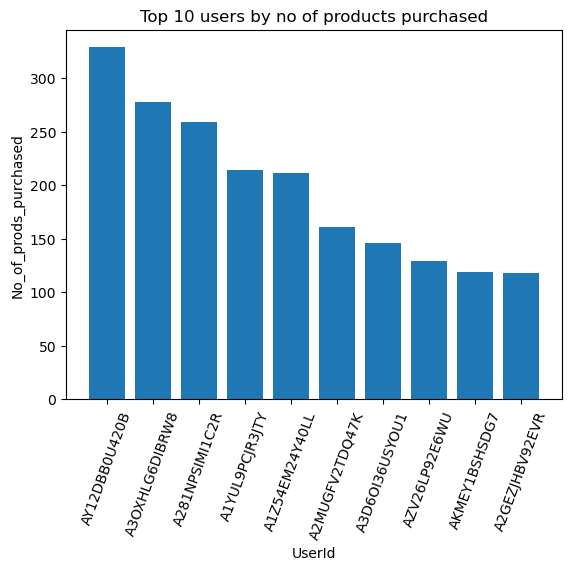

In [33]:
plt.bar(recommend_df.index[0:10],recommend_df['No_of_prods_purchased'][0:10].values)   # taking x value and y value from above 
plt.xticks(rotation=70) #create bar chart with rotation of 70 degree
plt.xlabel('UserId')
plt.ylabel('No_of_prods_purchased')
plt.title('Top 10 users by no of products purchased')
plt.show()

**Problem statement 4: Which product has good no of reviews ?**

In [34]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [35]:
len(data['ProductId'].unique() )  # see the length is too high so to filter we will put a threshold value greater than 500

67624

In [36]:
prod_count=data['ProductId'].value_counts().to_frame()   #convert it into dataFrame

In [37]:
prod_count['count']>500    # we are using this as filter in our dataset 

ProductId
B007JFMH8M     True
B002QWP89S     True
B003B3OOPA     True
B001EO5Q64     True
B0013NUGDE     True
              ...  
B002DNX4GO    False
B000FM2YU2    False
B001M1VA32    False
B009858H6M    False
B001LR2CU2    False
Name: count, Length: 67624, dtype: bool

In [38]:
prod_count[prod_count['count']>500]

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [39]:
freg_prod_ids=prod_count[prod_count['count']>500].index

In [40]:
freg_prod_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [41]:
data['ProductId'].isin(freg_prod_ids)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [42]:
freq_prod_df=data[data['ProductId'].isin(freg_prod_ids)]

In [43]:
type(freq_prod_df)

pandas.core.frame.DataFrame

In [44]:
freq_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


<Axes: xlabel='count', ylabel='ProductId'>

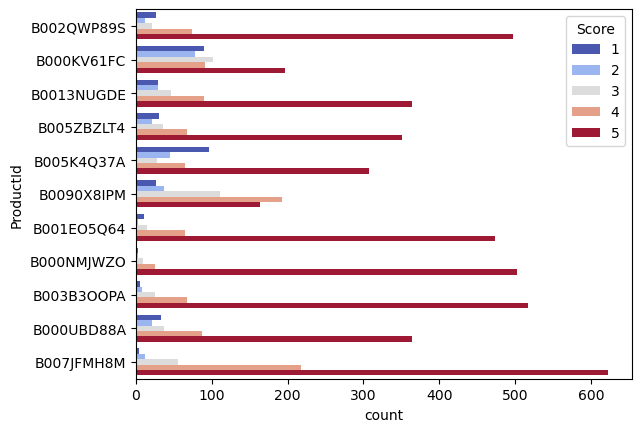

In [45]:
sns.countplot(y='ProductId',data=freq_prod_df,hue='Score',palette='coolwarm') 
# create count plot for product id with hue as score and color palette as coolwarm

**Problem statement 5 : Is There any difference between behavior of frequent viewers & not frequent viewers ?**

In [46]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [47]:
x=data['UserId'].value_counts()

In [48]:
data.head(7)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


In [49]:
data['viewer_type']=data['UserId'].apply(lambda user:'Frequent' if x[user]>50 else 'Not Frequent')

In [50]:
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent


In [51]:
data['viewer_type'].unique() 

array(['Not Frequent', 'Frequent'], dtype=object)

In [52]:
not_freq_df=data[data['viewer_type']=='Not Frequent']

In [53]:
freq_df=data[data['viewer_type']=='Frequent']

In [54]:
freq_df['Score'].value_counts()


Score
5    5765
4    1979
3     897
2     368
1     349
Name: count, dtype: int64

In [55]:
freq_df['Score'].value_counts()/len(freq_df)*100 # percentage of frequent users score distribution

Score
5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: count, dtype: float64

In [56]:
not_freq_df['Score'].value_counts()

Score
5    245196
4     54114
1     35957
3     28872
2     20434
Name: count, dtype: int64

In [57]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100 # percentage of not frequent users score distribution

Score
5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: count, dtype: float64

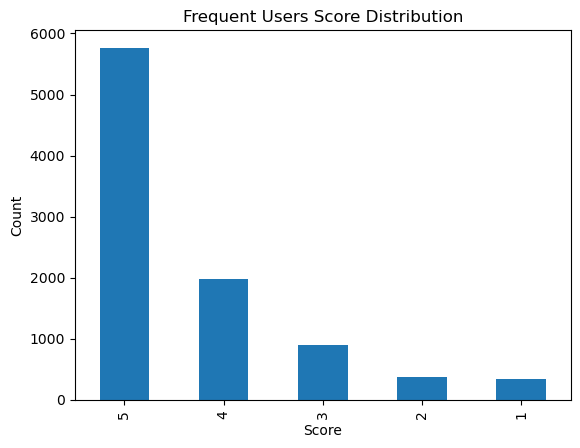

In [58]:
freq_df['Score'].value_counts().plot(kind='bar') # plot for frequent users score distribution
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Frequent Users Score Distribution')
plt.show()  

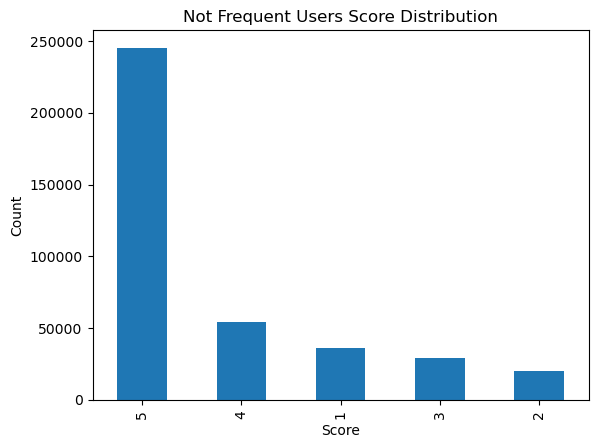

In [60]:
not_freq_df['Score'].value_counts().plot(kind='bar') # plot for not frequent users score distribution
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Not Frequent Users Score Distribution')
plt.show()

**Problem Statement 6: Are frequent users more verbose(speaks or post)?**

In [61]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

In [62]:
data[['UserId','ProductId','Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [63]:
type(data['Text'][0])

str

In [64]:
type(data['Text'][0].split(' '))

list

In [65]:
len(data['Text'][0].split(' '))

49

In [66]:
def calculate_length(text):
    return len(text.split(' '))

In [67]:
data['Text_length']=data['Text'].apply(calculate_length)

In [68]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [69]:
freq_df=data[data['viewer_type']=='Frequent']
not_freq_df=data[data['viewer_type']=='Not Frequent']

(0.0, 600.0)

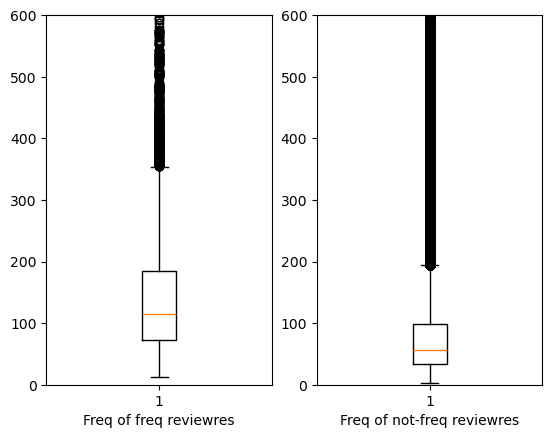

In [88]:
fig= plt.figure()
ax1=fig.add_subplot(121)
ax1.boxplot(freq_df['Text_length'])
ax1.set_xlabel('Freq of freq reviewres')
ax1.set_ylim(0,600)

ax2=fig.add_subplot(122)
ax2.boxplot(not_freq_df['Text_length'])
ax2.set_xlabel("Freq of not-freq reviewres")
ax2.set_ylim(0,600)

**Problem Statement 6: Sentiment analysis**

In [ ]:
#!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 3.9 MB/s eta 0:00:00


In [71]:
from textblob import TextBlob

In [72]:
data['Summary']

0                      Good Quality Dog Food
1                          Not as Advertised
2                      "Delight" says it all
3                             Cough Medicine
4                                Great taffy
                         ...                
568449                   Will not do without
568450                          disappointed
568451              Perfect for our maltipoo
568452    Favorite Training and reward treat
568453                           Great Honey
Name: Summary, Length: 393931, dtype: object

In [73]:
TextBlob('Good Quality Dog Food').sentiment.polarity    
#TextBlob is used for processing textual data for sentiment analysis
#it will provide the polarity value to calculate sentiment

0.7

In [74]:
data.shape

(393931, 12)

In [75]:
sample=data[0:50000]

In [76]:
polarity=[]  # create empty list to store polarity values
for text in sample['Summary']:
    try:
      polarity.append(TextBlob(text).sentiment.polarity ) 
    except:
        polarity.append(0)
    

In [77]:
sample['polarity']=polarity

In [78]:
sample

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.700000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.000000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.000000
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.000000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54249,54250,B001H0FI22,A3G7BEJJCPD6DS,LuxuryReading,1,1,4,2009-05-20,My 2nd Favorite,This is my 2nd favorite Nescafe drink after th...,Not Frequent,62,0.250000
54250,54251,B001H0FI22,AM8W6Y3HVXLZT,"D. P. Schroeder ""Paukenwirbel""",3,4,4,2009-05-11,Best of 5 flavors available,This flavor is by far the best of the 5 flavor...,Not Frequent,80,0.700000
54251,54252,B001H0FI22,AEWYUPCNDV7HY,Modern Blue Argonaut,2,3,2,2009-04-21,Just not very good!,If you enjoy making cappuccino's with your Dol...,Not Frequent,217,-0.336538
54252,54253,B001H0FI22,AROBCX5WMM863,toni t haugen,0,0,4,2012-10-24,pricey but good.,"the cappuccino is very good, but because there...",Not Frequent,59,0.700000


In [79]:
sample_negative=sample[sample['polarity']<0]   #-ve polarity
sample_positive=sample[sample['polarity']>0]    #+ve polarity

In [80]:
from collections import Counter

In [81]:
Counter(sample_negative['Summary']).most_common(10) # top 10 -ve summary

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [82]:
Counter(sample_positive['Summary']).most_common(10) # top 10 +ve summary

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]

In [83]:
# ----------------------------------------------------------
# SENTIMENT ANALYSIS ON REVIEW SUMMARY (50K sample for speed)
# ----------------------------------------------------------

print("Starting Sentiment Analysis...")

# Use first 50,000 rows for faster execution
sample = df.head(50000).copy()

# Function to calculate polarity
def get_polarity(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return 0

# Apply polarity
sample['polarity'] = sample['Summary'].apply(get_polarity)

# Categorize sentiment
def categorize_sentiment(p):
    if p > 0:
        return "Positive"
    elif p < 0:
        return "Negative"
    else:
        return "Neutral"

sample['sentiment'] = sample['polarity'].apply(categorize_sentiment)

# Count sentiment categories
sentiment_counts = sample['sentiment'].value_counts()

sentiment_counts


Starting Sentiment Analysis...


sentiment
Positive    29149
Neutral     16224
Negative     4627
Name: count, dtype: int64

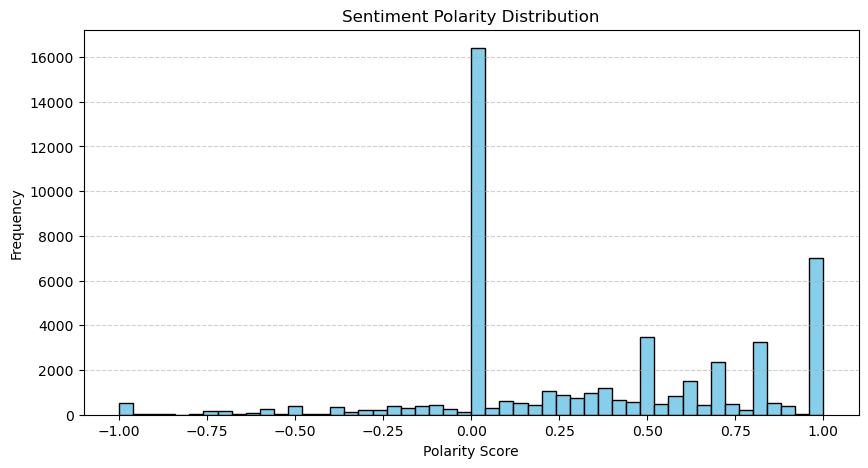

In [84]:
plt.figure(figsize=(10,5))
plt.hist(sample['polarity'], bins=50, color='skyblue', edgecolor='black')
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


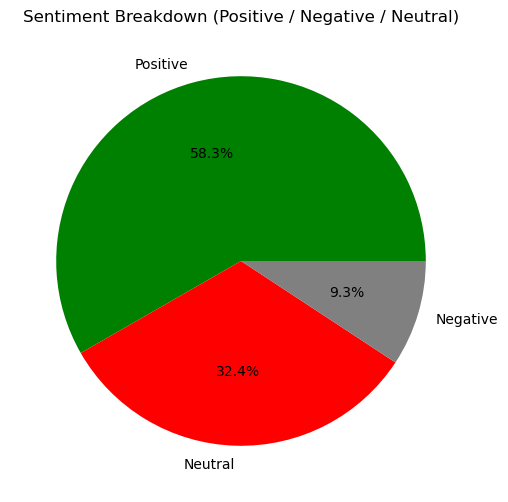

In [85]:
plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    colors=['green', 'red', 'gray']
)
plt.title("Sentiment Breakdown (Positive / Negative / Neutral)")
plt.show()


In [86]:
print("Total Reviews Analyzed:", len(sample))
print("Positive:", sentiment_counts.get('Positive', 0))
print("Negative:", sentiment_counts.get('Negative', 0))
print("Neutral:", sentiment_counts.get('Neutral', 0))


Total Reviews Analyzed: 50000
Positive: 29149
Negative: 4627
Neutral: 16224
